In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Simple Linear Regression

In [2]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(100)
y = 2 * x - 5 + rng.randn(100)

In [3]:
# Ensure my x is 2D in nature.
x = x.reshape(100,1)

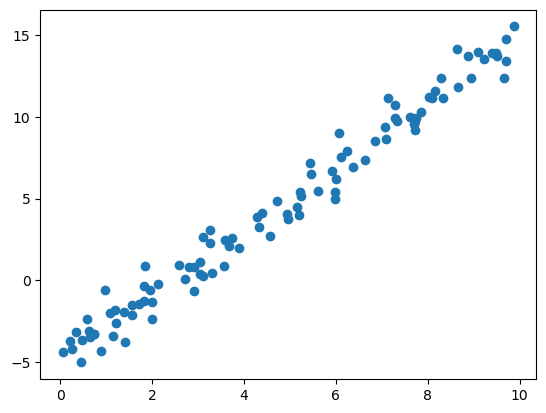

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x,y)

LinearRegression()

In [6]:
xfit = np.linspace(0,10,1000)
yfit = model.predict(xfit.reshape(xfit.shape[0],1))

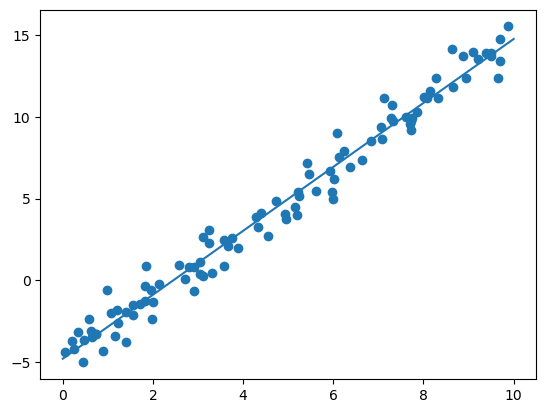

In [7]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [8]:
# This gives methods we can use for our object, model.
# This is just like the signature method we use for the possible parameters of a function.
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [9]:
# Returns the coefficient of the x variable.
# Notice how this is almost close to 2 -- remember y = 2 * x - 5 + rng.randn(100)
# The rng.randn(100) adds error -- the original scatter is based on 2x-5.
model.coef_

array([1.95402268])

In [10]:
# Notice how this is also close to -5.
model.intercept_

-4.78490384245325

# Basis Function Regression <br/>
Used to adapt Linear Regression to non-linear relationships.\
Polynomial and Gaussian are different types.

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
x = np.array([5,7,9])
poly = PolynomialFeatures(4) # This does polynomial of degree 4.
poly.fit_transform(x.reshape(x.shape[0],1))

array([[1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03]])

In [13]:
#or use a pipeline to combine both
from sklearn.pipeline import make_pipeline
poly_pipe = make_pipeline(PolynomialFeatures(4),LinearRegression())

In [14]:
# The order of PolynomialFeatures(4) and LinearRegression() always matters since there is
# a heierarchy.
poly_pipe

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [15]:
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

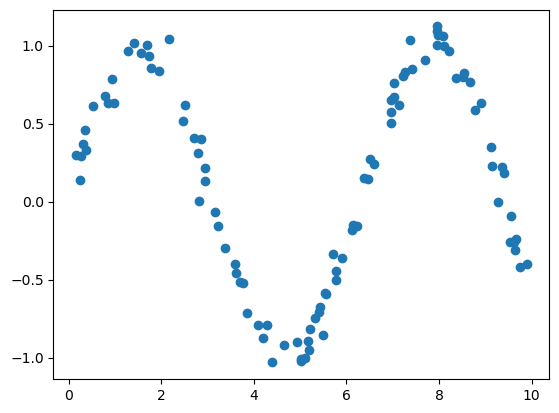

In [16]:
plt.scatter(x.reshape(x.shape[0],1),y)

In [17]:
# We are making x into a 2D array, that's what x.reshape(x.shape[0], 1) does.
poly_pipe.fit(x.reshape(x.shape[0],1),y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [18]:
xfit = np.linspace(0,10,1000)
yfit1 = poly_pipe.predict(xfit.reshape(xfit.shape[0],1))

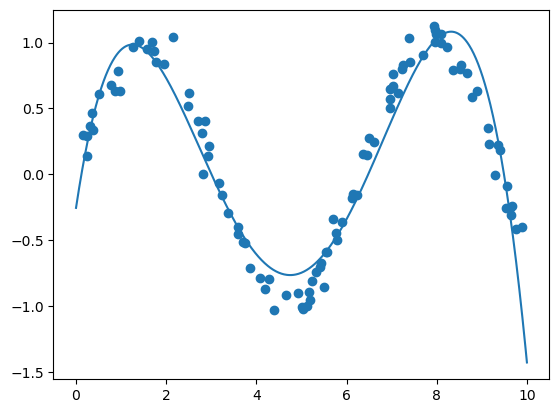

In [19]:
plt.scatter(x,y)
plt.plot(xfit,yfit1)

# Regularization

What if we have overfitting issues? What if PolynomialFeatures(2) overfit?

In [20]:
x = np.linspace(-5, 5, 100)
y = np.sin(x) + np.random.normal(0, 0.5, 100)

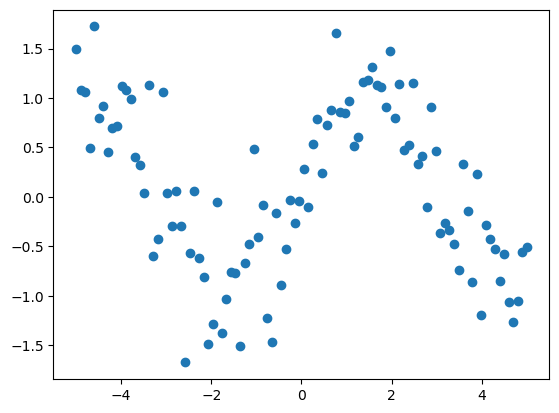

In [21]:
plt.scatter(x.reshape(x.shape[0],1),y)

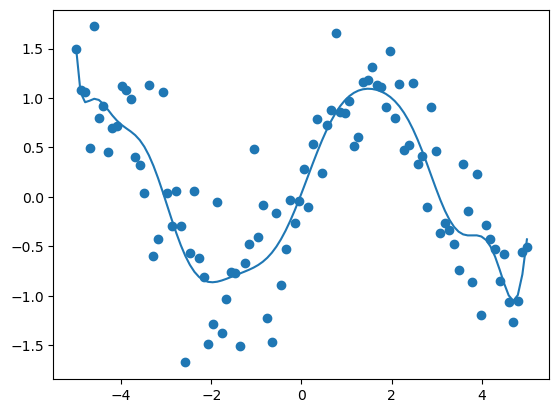

In [22]:
# If we look at this model, is it overfit? If it is and we use testing data, 
# our results may not be good.
poly_pipe1 = make_pipeline(PolynomialFeatures(15),LinearRegression())
poly_pipe1.fit(x.reshape(x.shape[0],1),y)
xfit = x
yfit2 = poly_pipe1.predict(xfit.reshape(xfit.shape[0],1))
plt.scatter(x,y)
plt.plot(xfit,yfit2)

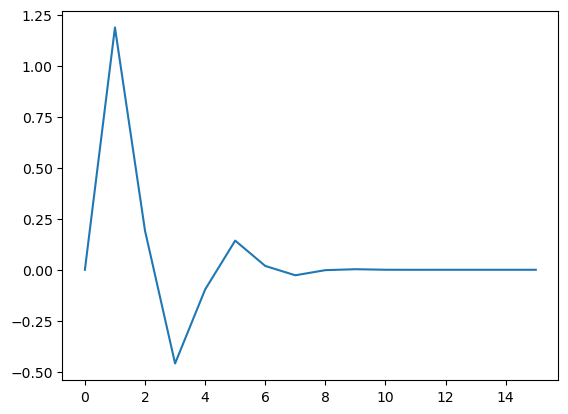

In [23]:
# Plot to see if there is some overfitting.
plt.plot(poly_pipe1.named_steps['linearregression'].coef_)

## How do you identify overfitting? <br/>
1. Large magnitude coefficients
2. High variability in coefficient values
3. Inconsistent signs of coefficients
4. Discrepancy between training and validation performance
5. Visual inspection

## Ridge Regression <br/>
Penalizes the sum of squares of model coefficient values <br/>
alpha determines the strength of penalty

The Loss Function is used to calculate the error of the model. The entire goal of machine learning is to minimize the Loss Function. Ridge Regression says when I see a large coefficient value, I am going to penalize your model to ensure the error decreases.\
Speficially, Ridge Regression takes the Loss Function and adds the sum of squares of the coefficients and adjusts it:\
Ridge = Loss(LinReg) + alpha*(sum(a1 + a2 + a3 + ... + an)^2).\
Alpha is the regularization hyperparameter.

/Users/cwbenton/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.21249e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


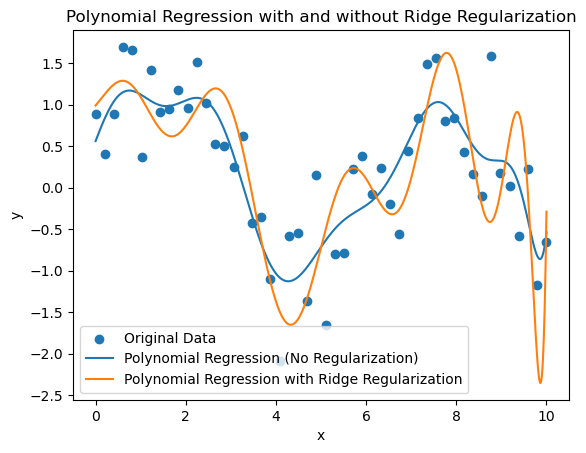

In [24]:
from sklearn.linear_model import Ridge
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(0, 0.5, 50)

# Plot the original data
plt.scatter(x, y, label='Original Data')

# Fit polynomial regression without regularization
poly_pipe1 = make_pipeline(PolynomialFeatures(15), LinearRegression())
poly_pipe1.fit(x.reshape(-1, 1), y)
xfit = np.linspace(0, 10, 1000)
yfit1 = poly_pipe1.predict(xfit.reshape(-1, 1))
plt.plot(xfit, yfit1, label='Polynomial Regression (No Regularization)')

# Fit polynomial regression with Ridge regularization
poly_pipe2 = make_pipeline(PolynomialFeatures(15), Ridge(alpha=1.0))
poly_pipe2.fit(x.reshape(-1, 1), y)
yfit2 = poly_pipe2.predict(xfit.reshape(-1, 1))
plt.plot(xfit, yfit2, label='Polynomial Regression with Ridge Regularization')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with and without Ridge Regularization')
plt.legend()
plt.show()

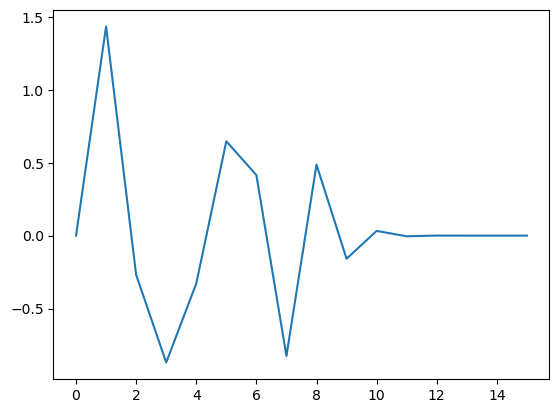

In [25]:
plt.plot(poly_pipe1.named_steps['linearregression'].coef_)

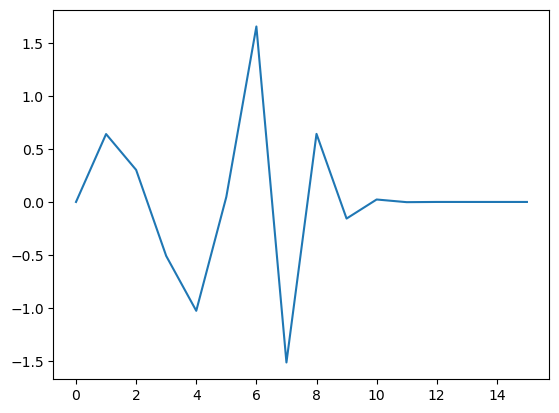

In [26]:
plt.plot(poly_pipe2.named_steps['ridge'].coef_)

## Lasso Regression <br/>
penalizes the sum of absolute values of regression coefficients <br/>
preferrentially sets a few coefficients to zero, thereby making the model dependent on only a few features <br/>
Hence, can be used in feature selection

Lasso = Loss(LinReg) + sum(|a1 + a2 + a3 + ... + an|)

/Users/cwbenton/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.383e+01, tolerance: 3.965e-03
  model = cd_fast.enet_coordinate_descent(


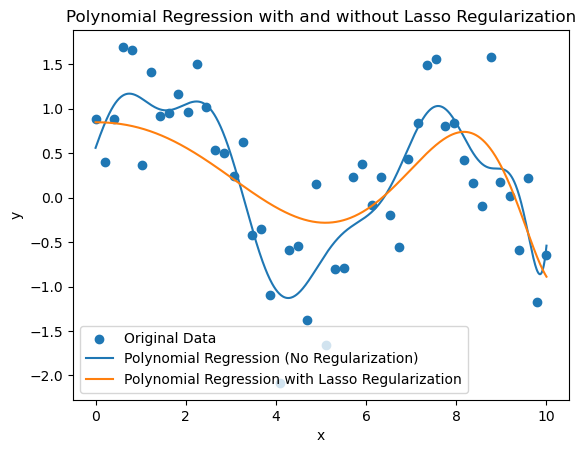

In [27]:
from sklearn.linear_model import Lasso
np.random.seed(0)
x = np.linspace(0, 10, 50)
y = np.sin(x) + np.random.normal(0, 0.5, 50)

# Plot the original data
plt.scatter(x, y, label='Original Data')

# Fit polynomial regression without regularization
poly_pipe1 = make_pipeline(PolynomialFeatures(15), LinearRegression())
poly_pipe1.fit(x.reshape(-1, 1), y)
xfit = np.linspace(0, 10, 1000)
yfit1 = poly_pipe1.predict(xfit.reshape(-1, 1))
plt.plot(xfit, yfit1, label='Polynomial Regression (No Regularization)')

# Fit polynomial regression with Lsso regularization
poly_pipe2 = make_pipeline(PolynomialFeatures(15), Lasso(alpha=1.0))
poly_pipe2.fit(x.reshape(-1, 1), y)
yfit2 = poly_pipe2.predict(xfit.reshape(-1, 1))
plt.plot(xfit, yfit2, label='Polynomial Regression with Lasso Regularization')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression with and without Lasso Regularization')
plt.legend()
plt.show()

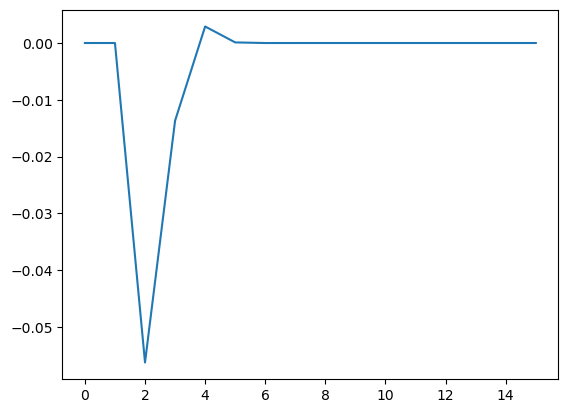

In [28]:
plt.plot(poly_pipe2.named_steps['lasso'].coef_)